# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [13]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

#### 年齡資料 ('DAYS_BIRTH' 除以 365) 離散化

In [6]:
#根據年齡區分不同組別(年齡區間-還款與否)
age_data = app_train[['TARGET','DAYS_BIRTH']] #subset
age_data['YEAR_BIRTH'] = age_data['DAYS_BIRTH'] / 365
age_data.head()

C:\ProgramData\anaconda3\envs\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,TARGET,DAYS_BIRTH,YEAR_BIRTH
0,1,9461,25.920548
1,0,16765,45.931507
2,0,19046,52.180822
3,0,19005,52.068493
4,0,19932,54.608219


In [16]:
bin_cut = 10
age_data['YEAR_BINNED'] = pd.cut(age_data['YEAR_BIRTH'],bins = bin_cut)
age_data['YEAR_BINNED'].value_counts()

C:\ProgramData\anaconda3\envs\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(35.099, 39.959]    41758
(39.959, 44.819]    40350
(30.238, 35.099]    38430
(44.819, 49.679]    34311
(49.679, 54.54]     33544
(25.378, 30.238]    33127
(54.54, 59.4]       32650
(59.4, 64.26]       27685
(20.469, 25.378]    13679
(64.26, 69.121]     11977
Name: YEAR_BINNED, dtype: int64

In [17]:
age_data.head()

,TARGET,DAYS_BIRTH,YEAR_BIRTH,YEAR_GROUP,YEAR_BINNED
0,1,9461,25.920548,"(25.378, 30.238]","(25.378, 30.238]"
1,0,16765,45.931507,"(44.819, 49.679]","(44.819, 49.679]"
2,0,19046,52.180822,"(49.679, 54.54]","(49.679, 54.54]"
3,0,19005,52.068493,"(49.679, 54.54]","(49.679, 54.54]"
4,0,19932,54.608219,"(54.54, 59.4]","(54.54, 59.4]"


In [18]:
year_group_sorted = sorted(age_data['YEAR_BINNED'].unique()) 
year_group_sorted

[Interval(20.469, 25.378, closed='right'),
 Interval(25.378, 30.238, closed='right'),
 Interval(30.238, 35.099, closed='right'),
 Interval(35.099, 39.959, closed='right'),
 Interval(39.959, 44.819, closed='right'),
 Interval(44.819, 49.679, closed='right'),
 Interval(49.679, 54.54, closed='right'),
 Interval(54.54, 59.4, closed='right'),
 Interval(59.4, 64.26, closed='right'),
 Interval(64.26, 69.121, closed='right')]

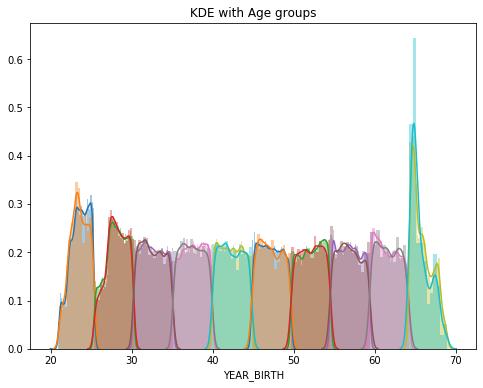

In [19]:
plt.figure(figsize=(8,6))
for i in range(len(year_group_sorted)):
    sns.distplot(age_data.loc[(age_data['YEAR_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 0), 'YEAR_BIRTH'], label= str(year_group_sorted[i]))
    sns.distplot(age_data.loc[(age_data['YEAR_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 1), 'YEAR_BIRTH'], label= str(year_group_sorted[i]))
plt.title('KDE with Age groups')
plt.show()

In [20]:
#計算每個年齡區間的TARGET, DAYS_BIRTH, YEAR_BIRTH 的平均值
age_groups = age_data.groupby('YEAR_GROUP').mean()
age_groups

,TARGET,DAYS_BIRTH,YEAR_BIRTH
YEAR_GROUP,,,
"(20.469, 25.378]",0.122012,8606.136194,23.578455
"(25.378, 30.238]",0.111390,10244.567543,28.067308
"(30.238, 35.099]",0.101900,11913.765912,32.640455
"(35.099, 39.959]",0.089468,13717.780090,37.582959
"(39.959, 44.819]",0.078984,15459.271499,42.354168
"(44.819, 49.679]",0.074437,17230.114191,47.205792
"(49.679, 54.54]",0.067911,19044.489208,52.176683
"(54.54, 59.4]",0.055926,20773.446217,56.913551
"(59.4, 64.26]",0.052953,22521.192198,61.701896


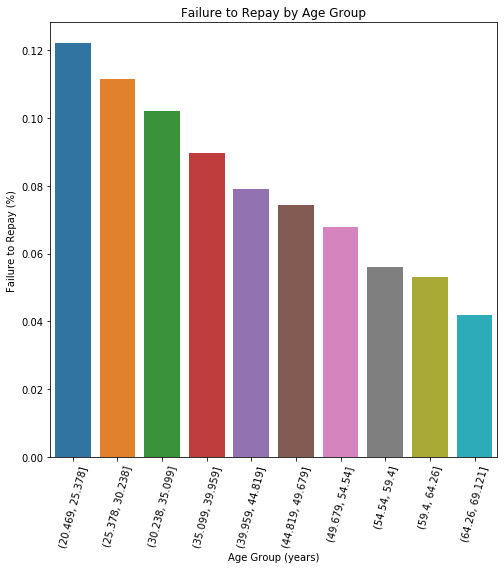

In [21]:
plt.figure(figsize = (8,8))

px = age_groups.index
py = age_groups['TARGET']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

#### AMT_INCOME_TOTAL 離散化

In [23]:
app_train['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [24]:
app_train['AMT_INCOME_TOTAL_LOG'] = np.log1p(app_train['AMT_INCOME_TOTAL'])

#### cut

In [61]:
app_train['AIT_CUT'] = pd.cut(app_train['AMT_INCOME_TOTAL_LOG'],10)
app_train['AIT_CUT'].value_counts()

(11.837, 12.68]     141856
(10.995, 11.837]    140976
(12.68, 13.522]      15492
(10.144, 10.995]      8541
(13.522, 14.365]       582
(14.365, 15.208]        55
(15.208, 16.05]          6
(16.05, 16.893]          2
(17.735, 18.578]         1
(16.893, 17.735]         0
Name: AIT_CUT, dtype: int64

In [62]:
amt_data = app_train[['TARGET','AMT_INCOME_TOTAL_LOG','AIT_CUT']]
amt_data.head()

,TARGET,AMT_INCOME_TOTAL_LOG,AIT_CUT
0,1,12.218500,"(11.837, 12.68]"
1,0,12.506181,"(11.837, 12.68]"
2,0,11.119898,"(10.995, 11.837]"
3,0,11.813037,"(10.995, 11.837]"
4,0,11.707678,"(10.995, 11.837]"


In [63]:
ait_sorted = sorted(amt_data['AIT_CUT'].unique())
print(ait_sorted)

[Interval(10.144, 10.995, closed='right'), Interval(10.995, 11.837, closed='right'), Interval(11.837, 12.68, closed='right'), Interval(12.68, 13.522, closed='right'), Interval(13.522, 14.365, closed='right'), Interval(14.365, 15.208, closed='right'), Interval(15.208, 16.05, closed='right'), Interval(16.05, 16.893, closed='right'), Interval(17.735, 18.578, closed='right')]


C:\ProgramData\anaconda3\envs\python36\lib\site-packages\seaborn\distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\ProgramData\anaconda3\envs\python36\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\anaconda3\envs\python36\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\ProgramData\anaconda3\envs\python36\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\ProgramData\anaconda3\envs\python36\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


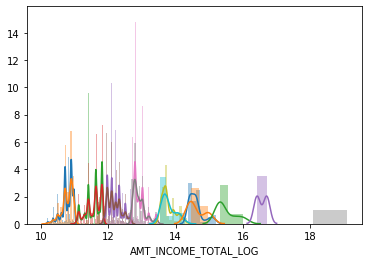

In [64]:
plt.figure(figsize=(6,4))
for i in range(len(ait_sorted)):
    sns.distplot(amt_data.loc[(amt_data['AIT_CUT'] == ait_sorted[i]) & \
                              (amt_data['TARGET'] ==0), 'AMT_INCOME_TOTAL_LOG'], label =str(ait_sorted[i]))
    sns.distplot(amt_data.loc[(amt_data['AIT_CUT'] == ait_sorted[i]) & \
                              (amt_data['TARGET'] ==1), 'AMT_INCOME_TOTAL_LOG'], label =str(ait_sorted[i]))
plt.show()

In [65]:
amt_groups = amt_data.groupby('AIT_CUT').mean()
amt_groups

,TARGET,AMT_INCOME_TOTAL_LOG
AIT_CUT,,
"(10.144, 10.995]",0.074581,10.783320
"(10.995, 11.837]",0.084837,11.558493
"(11.837, 12.68]",0.079510,12.205964
"(12.68, 13.522]",0.059127,12.922674
"(13.522, 14.365]",0.049828,13.776871
"(14.365, 15.208]",0.054545,14.605626
"(15.208, 16.05]",0.000000,15.502690
"(16.05, 16.893]",0.000000,16.562044
"(16.893, 17.735]",NaN,NaN


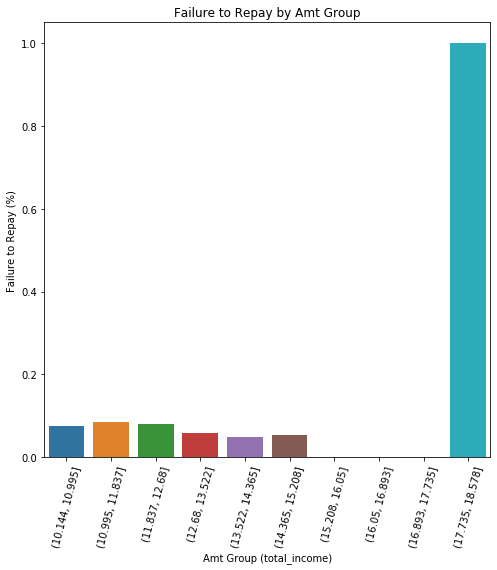

In [66]:
plt.figure(figsize = (8, 8))

# 以income區間為 x, target 為 y 繪製 barplot
"""
Your Code Here
"""
px = amt_groups.index
py = amt_groups['TARGET']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Amt Group (total_income)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Amt Group');

#### qcut

In [72]:
app_train['AIT_QCUT'] = pd.qcut(app_train['AMT_INCOME_TOTAL_LOG'],10)
app_train['AIT_QCUT'].value_counts()

(11.631, 11.813]    48849
(12.101, 12.324]    44809
(11.503, 11.631]    36907
(10.151, 11.302]    33391
(11.899, 11.995]    31120
(11.995, 12.101]    30704
(11.302, 11.503]    30280
(12.506, 18.578]    27161
(12.324, 12.506]    19957
(11.813, 11.899]     4333
Name: AIT_QCUT, dtype: int64

In [73]:
amt_data = app_train[['TARGET','AMT_INCOME_TOTAL_LOG','AIT_QCUT']]
amt_data.head()

,TARGET,AMT_INCOME_TOTAL_LOG,AIT_QCUT
0,1,12.218500,"(12.101, 12.324]"
1,0,12.506181,"(12.324, 12.506]"
2,0,11.119898,"(10.151, 11.302]"
3,0,11.813037,"(11.631, 11.813]"
4,0,11.707678,"(11.631, 11.813]"


In [74]:
ait_sorted = sorted(amt_data['AIT_QCUT'].unique())
print(ait_sorted)

[Interval(10.151, 11.302, closed='right'), Interval(11.302, 11.503, closed='right'), Interval(11.503, 11.631, closed='right'), Interval(11.631, 11.813, closed='right'), Interval(11.813, 11.899, closed='right'), Interval(11.899, 11.995, closed='right'), Interval(11.995, 12.101, closed='right'), Interval(12.101, 12.324, closed='right'), Interval(12.324, 12.506, closed='right'), Interval(12.506, 18.578, closed='right')]


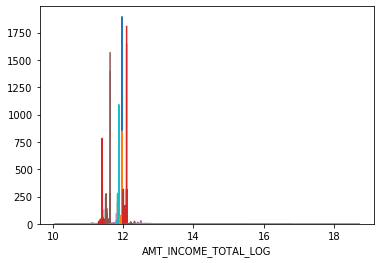

In [75]:
plt.figure(figsize=(6,4))
for i in range(len(ait_sorted)):
    sns.distplot(amt_data.loc[(amt_data['AIT_QCUT'] == ait_sorted[i]) & \
                              (amt_data['TARGET'] ==0), 'AMT_INCOME_TOTAL_LOG'], label =str(ait_sorted[i]))
    sns.distplot(amt_data.loc[(amt_data['AIT_QCUT'] == ait_sorted[i]) & \
                              (amt_data['TARGET'] ==1), 'AMT_INCOME_TOTAL_LOG'], label =str(ait_sorted[i]))
plt.show()

In [76]:
amt_groups = amt_data.groupby('AIT_QCUT').mean()
amt_groups

,TARGET,AMT_INCOME_TOTAL_LOG
AIT_QCUT,,
"(10.151, 11.302]",0.081908,11.081654
"(11.302, 11.503]",0.082232,11.418929
"(11.503, 11.631]",0.087192,11.619953
"(11.631, 11.813]",0.084894,11.788482
"(11.813, 11.899]",0.090007,11.870174
"(11.899, 11.995]",0.086407,11.964789
"(11.995, 12.101]",0.084224,12.089604
"(12.101, 12.324]",0.078065,12.266063
"(12.324, 12.506]",0.070401,12.465302


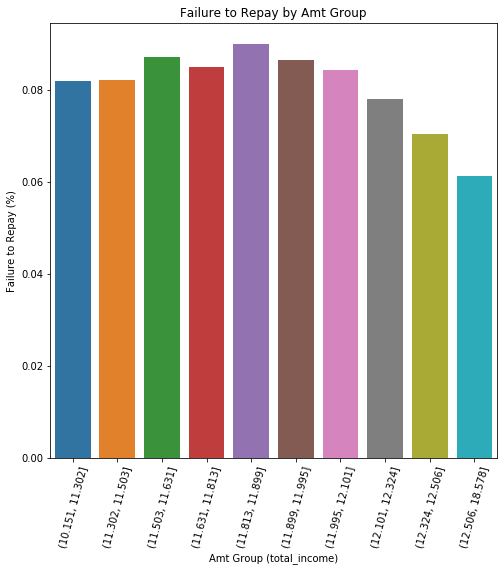

In [77]:
plt.figure(figsize = (8, 8))

# 以income區間為 x, target 為 y 繪製 barplot
"""
Your Code Here
"""
px = amt_groups.index
py = amt_groups['TARGET']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Amt Group (total_income)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Amt Group');